## Hourly Energy Consumption

###Import the libraries

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
plt.style.use('ggplot') # Make it pretty

In [2]:
# Data is saved in parquet format so schema is preserved.
df = pd.read_parquet('C:/Users/don_q/Downloads/est_hourly.paruqet/est_hourly.paruqet')

Data index is the date/hour, columns are for different regions within PJM.

Regions joined at different times, so not all have data for all dates. Regions also split (PJM_Load split to East and West)

In [3]:
#Show PJM Regions
from IPython.display import Image
Image(url= "http://slideplayer.com/4238181/14/images/4/PJM+Evolution.jpg")

Chek the rows we got in our dataset and the medatada

In [4]:
df.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AEP,121273.0,15499.513717,2591.399065,9581.0,13630.0,15310.0,17200.00,25695.0
COMED,66497.0,11420.152112,2304.139517,7237.0,9780.0,11152.0,12510.00,23753.0
DAYTON,121275.0,2037.851140,393.403153,982.0,1749.0,2009.0,2279.00,3746.0
DEOK,57739.0,3105.096486,599.859026,907.0,2687.0,3013.0,3449.00,5445.0
DOM,116189.0,10949.203625,2413.946569,1253.0,9322.0,10501.0,12378.00,21651.0
DUQ,119068.0,1658.820296,301.740640,1014.0,1444.0,1630.0,1819.00,3054.0
EKPC,45334.0,1464.218423,378.868404,514.0,1185.0,1386.0,1699.00,3490.0
FE,62874.0,7792.159064,1331.268006,0.0,6807.0,7700.0,8556.00,14032.0
NI,58450.0,11701.682943,2371.498701,7003.0,9954.0,11521.0,12896.75,23631.0
PJME,145366.0,32080.222831,6464.012166,14544.0,27573.0,31421.0,35650.00,62009.0


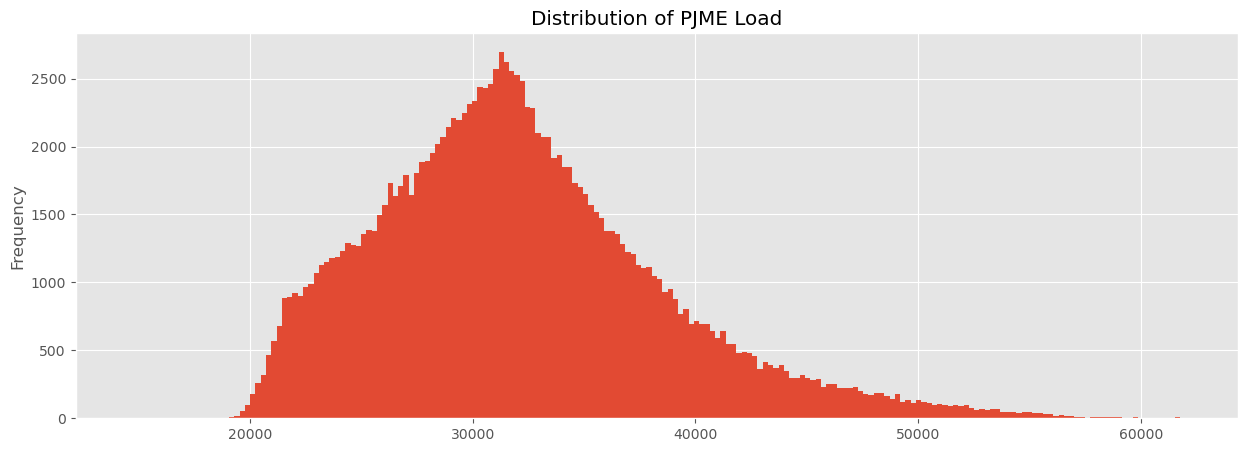

In [6]:
_ = df['PJME'].plot.hist(figsize=(15, 5), bins=200, title='Distribution of PJME Load')

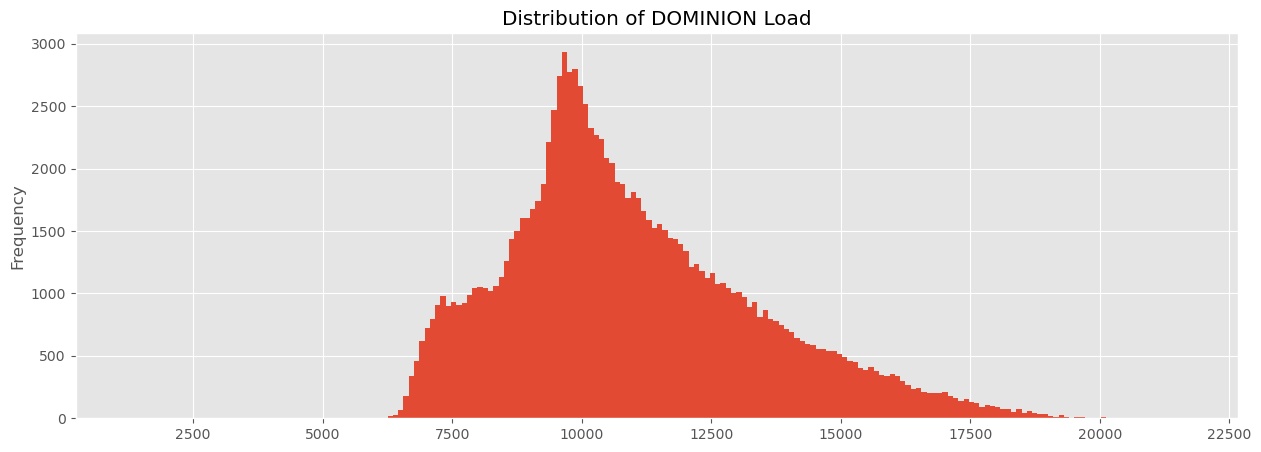

In [7]:
_ = df['DOM'].plot.hist(figsize=(15, 5), bins=200, title='Distribution of DOMINION Load')

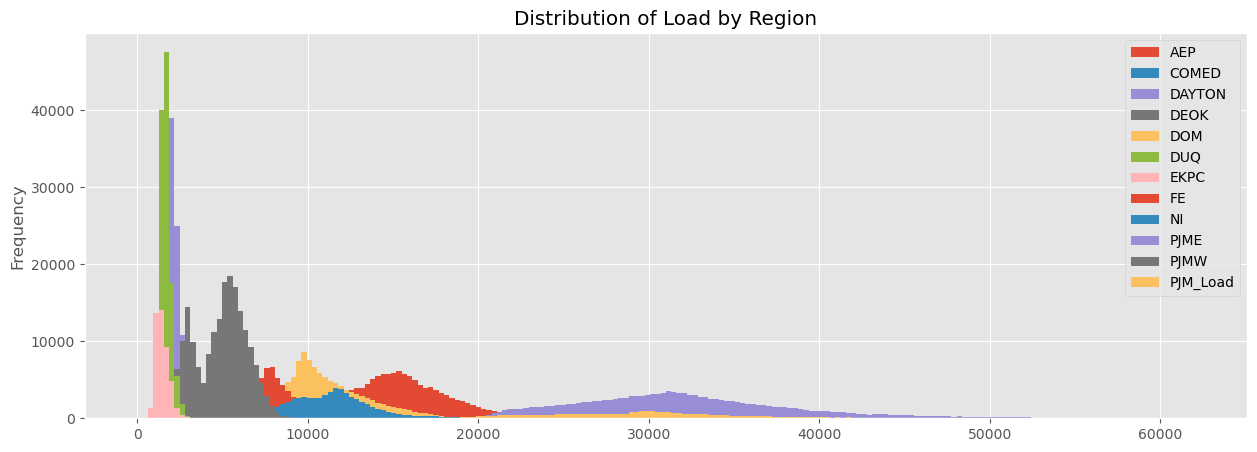

In [8]:
_ = df.plot.hist(figsize=(15, 5), bins=200, title='Distribution of Load by Region')

## Plot Time Series

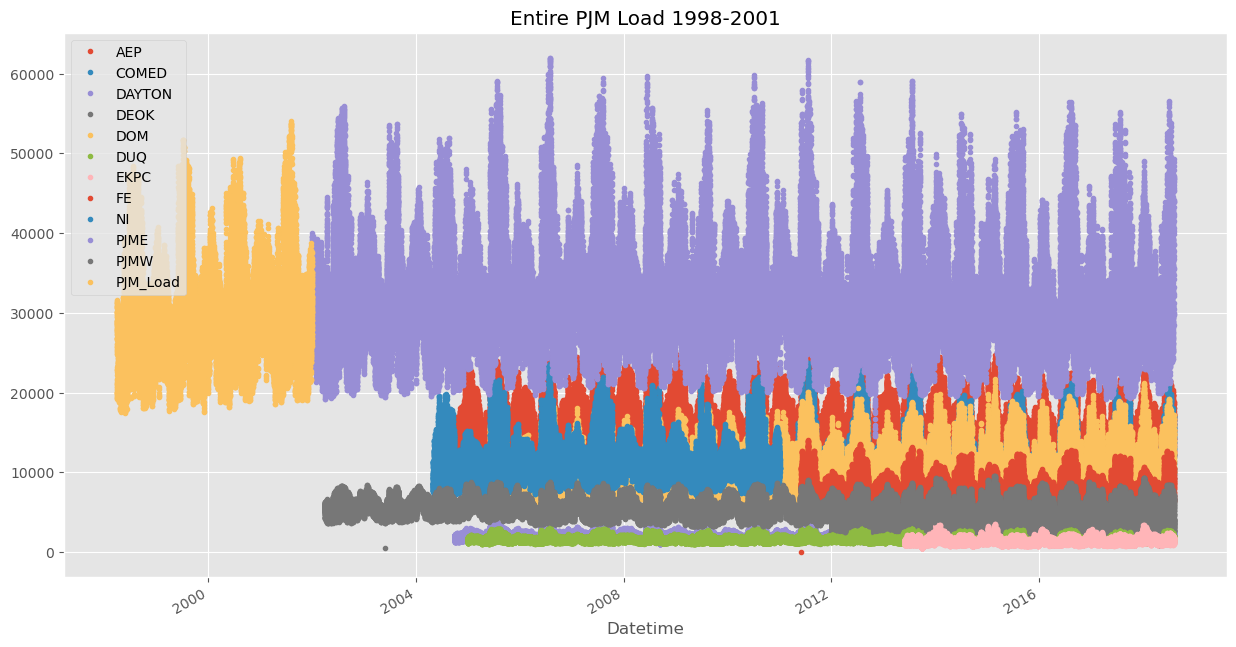

In [9]:
plot = df.plot(style='.', figsize=(15, 8), title='Entire PJM Load 1998-2001')

# Plotting Regions

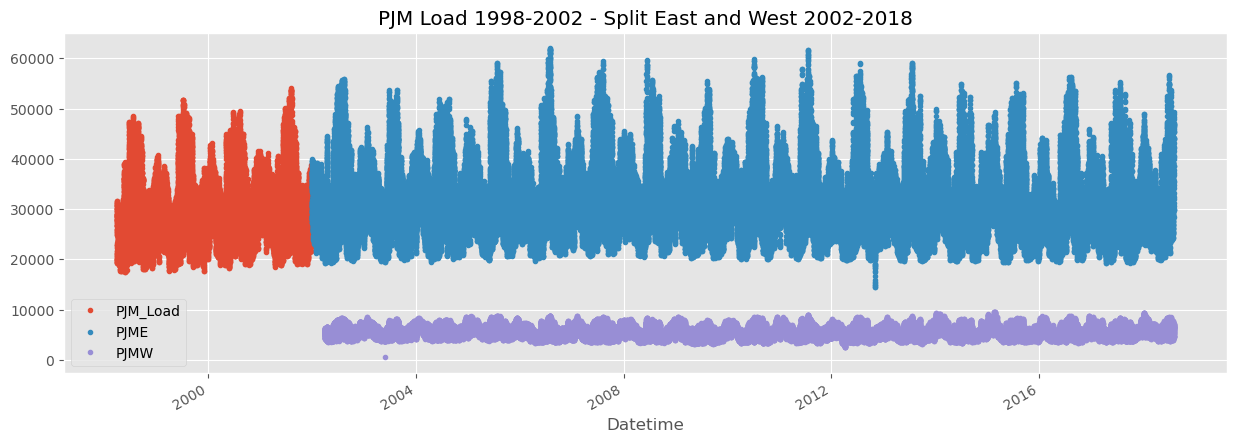

In [10]:
_ = df[['PJM_Load','PJME','PJMW']] \
    .plot(style='.', figsize=(15, 5), title='PJM Load 1998-2002 - Split East and West 2002-2018')

## Summer Demand vs Winter Demand
Take notice of the mid-day decreases during the winter season. Conversely, during the summer months, the daily energy consumption curve exhibits more of a bell shape. This pattern arises from the increased use of air conditioning, which leads to higher energy consumption during mid-day in the summer, whereas in the winter months, people tend to utilize less energy during that time.

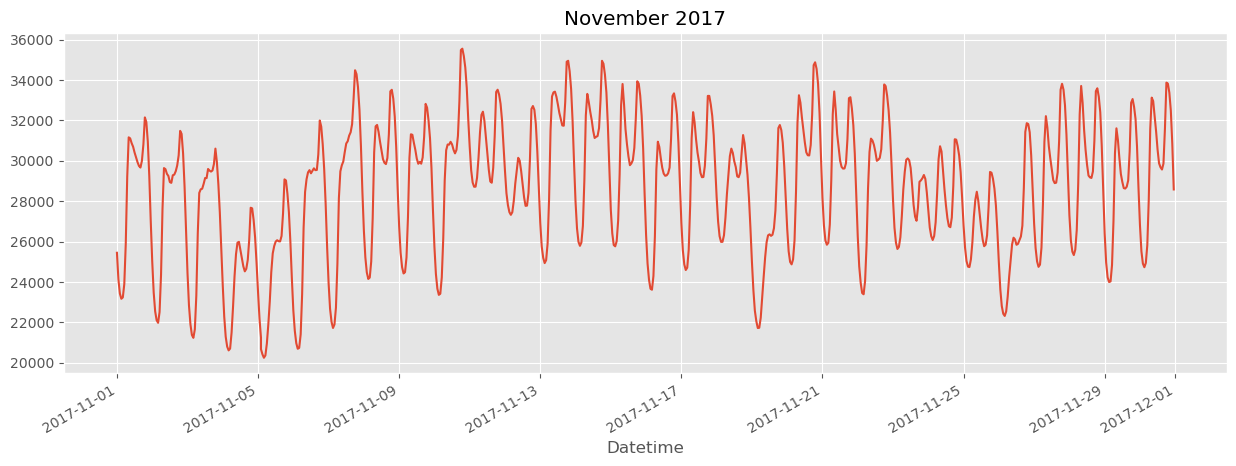

In [11]:
_ = df['PJME'].loc[(df['PJME'].index >= '2017-11-01') &
               (df['PJME'].index < '2017-12-01')] \
    .plot(figsize=(15, 5), title = 'November 2017')

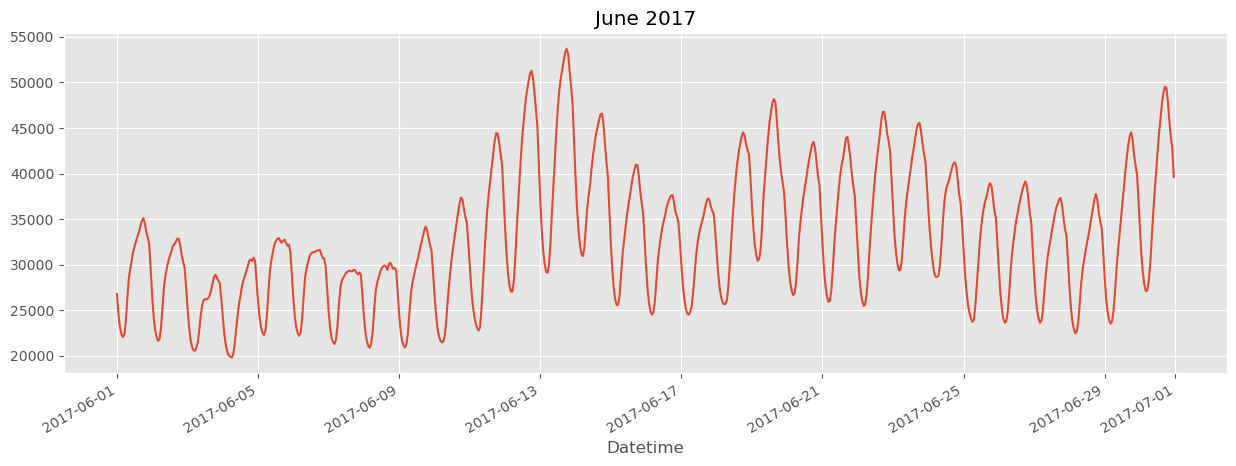

In [12]:
_ = df['PJME'].loc[(df['PJME'].index >= '2017-06-01') &
               (df['PJME'].index < '2017-07-01')] \
    .plot(figsize=(15, 5), title = 'June 2017')

 # Create Time Series Features

In [15]:
df['dow'] = df.index.dayofweek
df['doy'] = df.index.dayofyear
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['woy'] = df.index.strftime('%U').astype(int)  # Get the ISO week number
df['dom'] = df.index.day # Day of Month
df['date'] = df.index.date 

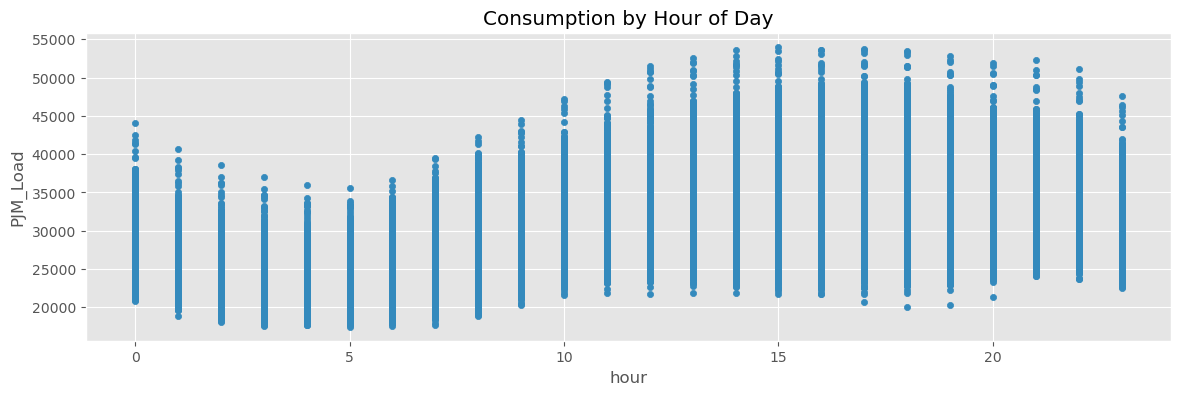

In [16]:
_ = df[['PJM_Load','hour']].plot(x='hour',
                                     y='PJM_Load',
                                     kind='scatter',
                                     figsize=(14,4),
                                     title='Consumption by Hour of Day')

Note Saturday and Sunday demand is much less than during a work week. This is also true for holidays.

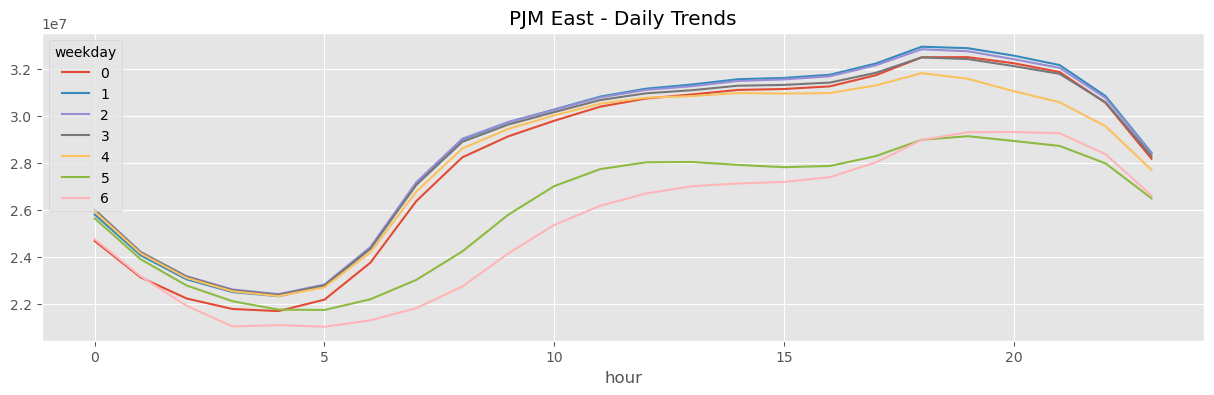

In [17]:
_ = df.pivot_table(index=df['hour'], 
                     columns='weekday', 
                     values='PJME',
                     aggfunc='sum').plot(figsize=(15,4),
                     title='PJM East - Daily Trends')

## Trends change depending on time of year

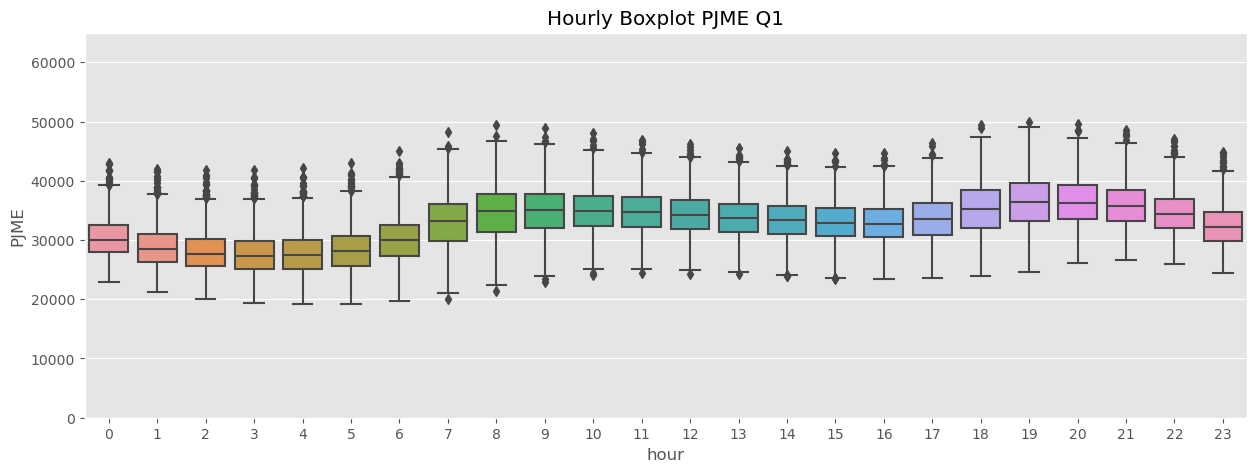

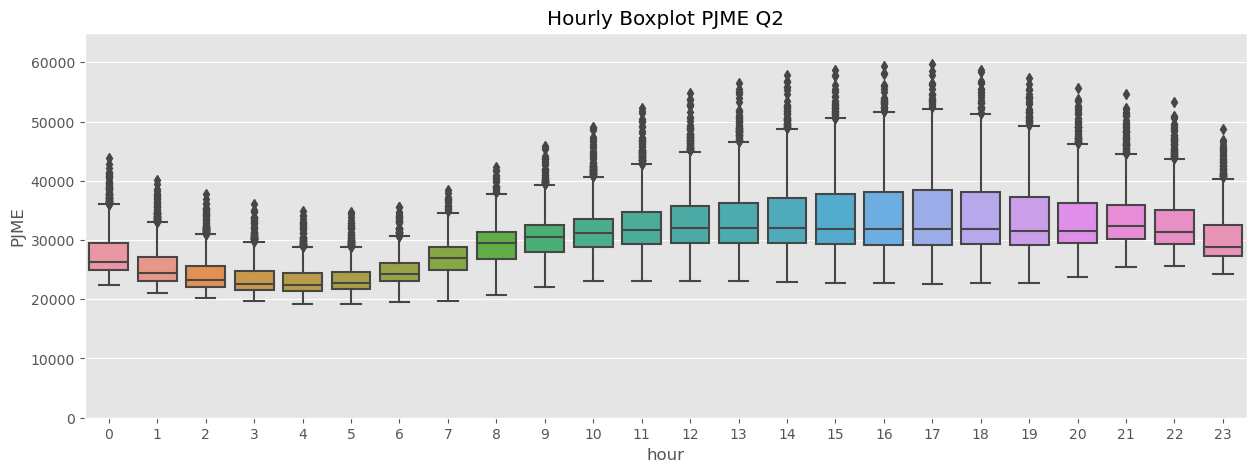

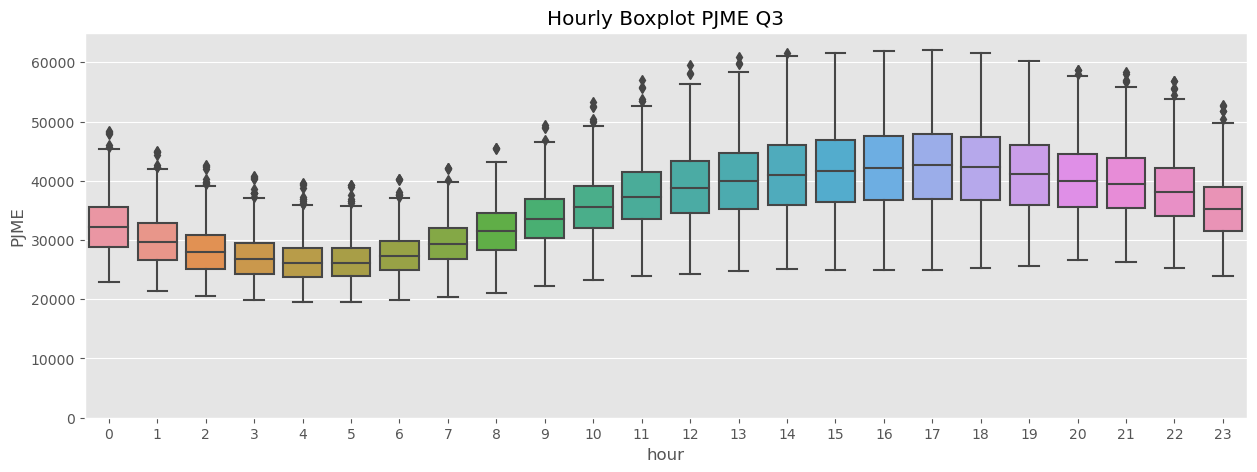

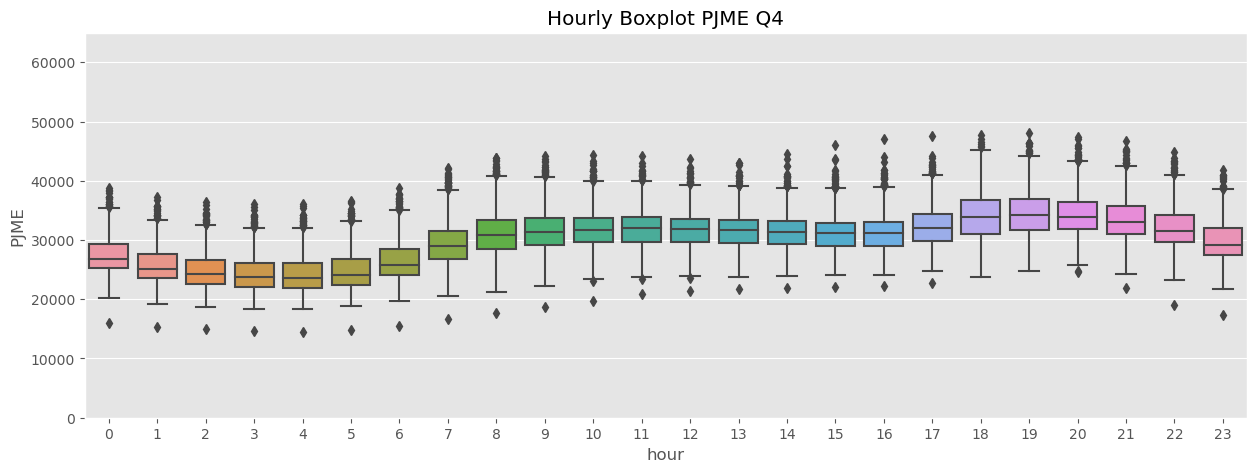

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.loc[df['quarter']==1].hour, y=df.loc[df['quarter']==1].PJME)
ax.set_title('Hourly Boxplot PJME Q1')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.loc[df['quarter']==2].hour, y=df.loc[df['quarter']==2].PJME)
ax.set_title('Hourly Boxplot PJME Q2')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.loc[df['quarter']==3].hour, y=df.loc[df['quarter']==3].PJME)
ax.set_title('Hourly Boxplot PJME Q3')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.loc[df['quarter']==4].hour, y=df.loc[df['quarter']==4].PJME)
ax.set_title('Hourly Boxplot PJME Q4')
_ = ax.set_ylim(0,65000)